<a href="https://colab.research.google.com/github/koji-to/sample/blob/master/lab_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#毎回winequalityN.csvをアップロードする必要があることを忘れない
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('https://raw.githubusercontent.com/reubengazer/Wine-Quality-Analysis/master/winequalityN.csv')
#print(data)
len(data)

6497

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data_anyna=data.dropna()
#data_anyna=data.dropna(how='any')
#print(data_anyna)
len(data_anyna)

6463

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc57c116ed0>,
      dtype=object)

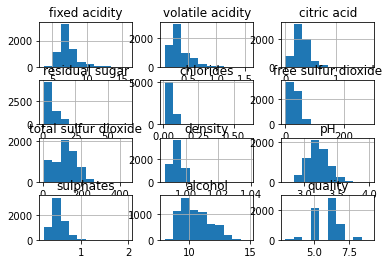

In [ ]:
data_anyna.hist()

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


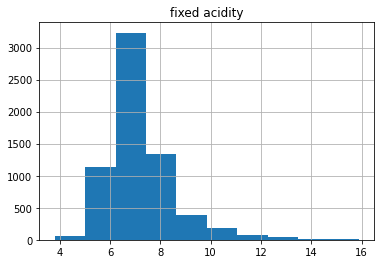

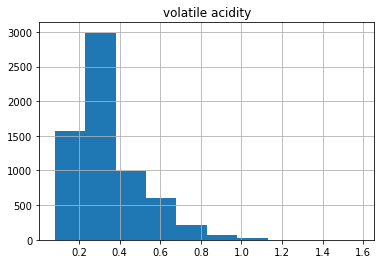

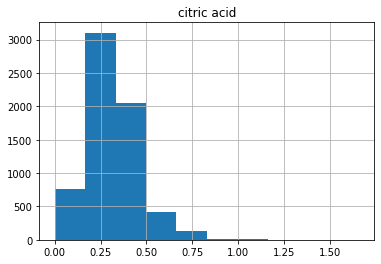

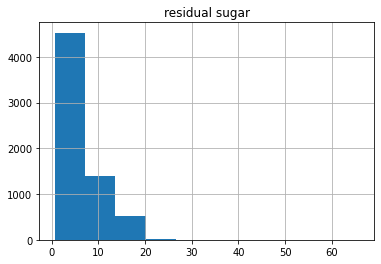

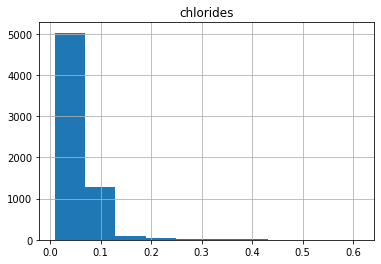

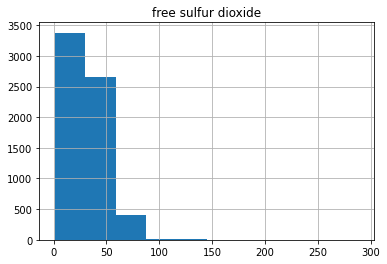

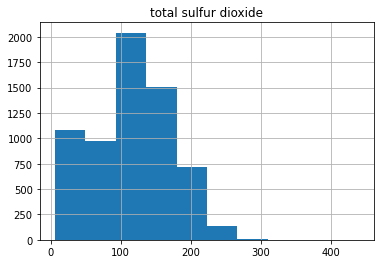

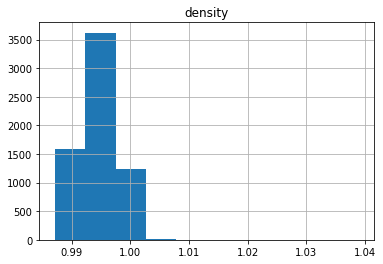

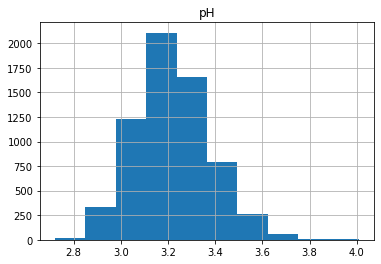

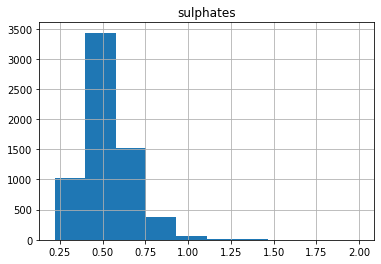

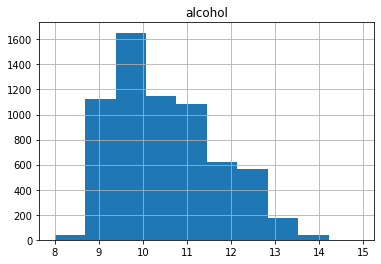

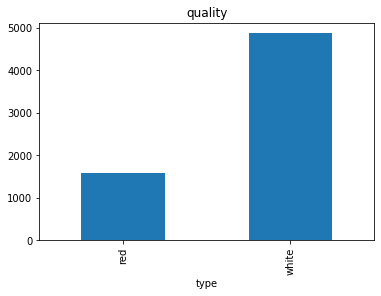

In [ ]:
print(data_anyna.columns)
for i in data_anyna.columns:
    #print(i)
    if(i!='type'):
        data_anyna.hist(i)
#data_anyna.hist('fixed acidity')
data_anyna.groupby('type')['quality'].count().plot.bar()
#data_anyna.groupby('type').count().plot.bar()

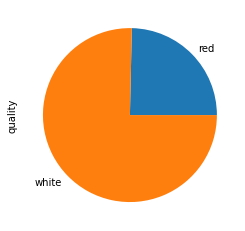

In [ ]:
data_anyna.groupby('type')['quality'].count().plot.pie()

0       0.308282
1       0.015337
2       0.096626
3       0.121166
4       0.121166
          ...   
6491    0.019939
6492    0.021472
6494    0.026074
6495    0.021472
6496    0.046012
Name: residual sugar, Length: 6463, dtype: float64
1.0
0.0


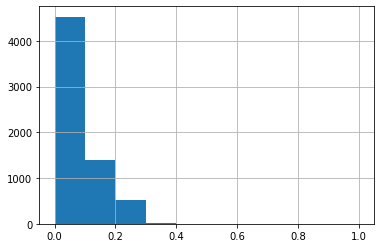

In [ ]:
## residual sugarに対するMin-Max標準化
data_rs=data_anyna['residual sugar']
data_rs_mmt=(data_rs - data_rs.min()) / (data_rs.max() - data_rs.min())
print(data_rs_mmt)
print(data_rs_mmt.max())
print(data_rs_mmt.min())

data_rs_mmt.hist()

0       3.030134
1       0.470004
2       1.931521
3       2.140066
4       2.140066
          ...   
6491    0.641854
6492    0.693147
6494    0.832909
6495    0.693147
6496    1.280934
Name: residual sugar, Length: 6463, dtype: float64


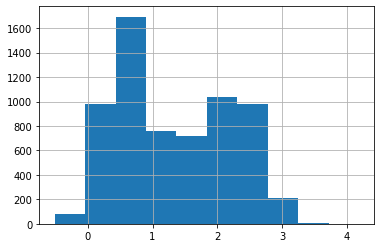

In [ ]:
## residual sugarに対する対数化
data_rs_log=data_rs.apply(np.log)
print(data_rs_log)

data_rs_log.hist()

0       3.207172
1      -0.808089
2       0.306094
3       0.642451
4       0.642451
          ...   
6491   -0.745022
6492   -0.723999
6494   -0.660933
6495   -0.723999
6496   -0.387643
Name: residual sugar, Length: 6463, dtype: float64
-5.0845912657411315e-15
1.000000000000009


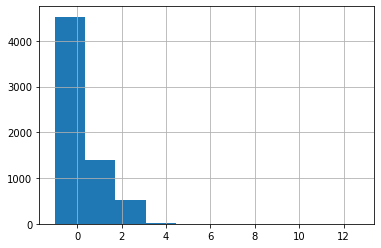

In [ ]:
## residual sugarに対するz-score変換
data_rs_zs=(data_rs - data_rs.mean()) / data_rs.std()
print(data_rs_zs)
print(data_rs_zs.mean())
print(data_rs_zs.std())

data_rs_zs.hist()

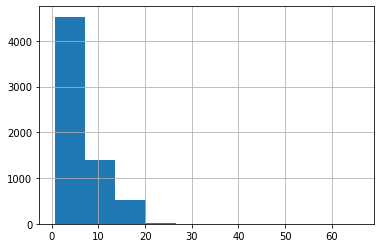

In [ ]:
data_rs.hist()

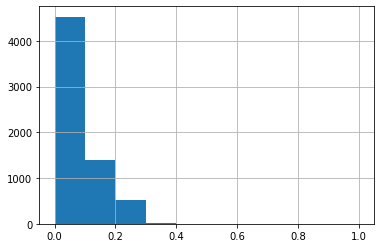

In [ ]:
data_rs_mmt.hist()

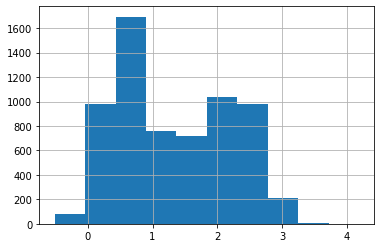

In [ ]:
data_rs_log.hist()

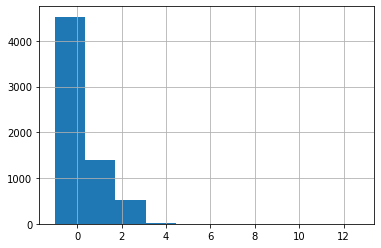

In [ ]:
data_rs_zs.hist()

In [ ]:
#統計量の算出
data_anyna.describe()

In [ ]:
#ダミー変数展開
data_anyna_dummy=pd.get_dummies(data_anyna)
# 重回帰のインポート
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#データを目的変数とそれ以外に分割
Y=data_anyna_dummy['quality']
X=data_anyna_dummy.drop('quality', axis=1)
# 重回帰モデルの構築
model.fit(X, Y)
#自己予測
Y_pred=model.predict(X)

In [ ]:
print('MAE: '+str(abs(Y_pred-Y).mean()))
print('MdAE; '+str(abs(Y_pred-Y).median()))
print('AE_STD: '+str(abs(Y_pred-Y).std()))
print('MRE: '+str(abs((Y_pred-Y)/Y).mean()))
print('MdRE: '+str(abs((Y_pred-Y)/Y).median()))
print('RE_STD: '+str(abs((Y_pred-Y)/Y).std()))
print('MER: '+str(abs((Y_pred-Y)/Y_pred).mean()))
print('MdER: '+str(abs((Y_pred-Y)/Y_pred).median()))
print('ER_STD: '+str(abs((Y_pred-Y)/Y_pred).std()))

MAE: 0.5680174198169884
MdAE; 0.46122230218907134
AE_STD: 0.4614177121908771
MRE: 0.10112945562488077
MdRE: 0.07967405066758697
RE_STD: 0.09663252366903015
MER: 0.09772124064082596
MdER: 0.07947312370411813
ER_STD: 0.07892584470723035


In [ ]:
#検証用
#np.savetxt('Y_pred.csv',Y_pred)
#np.savetxt('Y.csv',Y)

In [ ]:
#対数化，Min-Max標準化のためにカテゴリ変数列を一旦除外
data_anyna_num_var=data_anyna[data_anyna.columns[data_anyna.columns !='type']]

In [ ]:
#Min-Max標準化を実行
minmax_norm=lambda x: (x - min(x)) / (max(x) - min(x))
data_anyna_num_var_norm=data_anyna_num_var.apply(minmax_norm)

#カテゴリ変数列を元に戻し，ダミー変数展開
data_anyna_num_var_norm['type']=data_anyna['type']
data_anyna_num_var_norm_dummy=pd.get_dummies(data_anyna_num_var_norm)
data_anyna_num_var_norm_dummy['quality'].min()

0.0

In [ ]:
# Min-Max標準化後の重回帰による予測
Y=data_anyna_num_var_norm_dummy['quality']
X=data_anyna_num_var_norm_dummy.drop('quality', axis=1)
# 重回帰モデルの構築
model.fit(X, Y)
#自己予測
Y_pred=model.predict(X)

print('MAE: '+str(abs(Y_pred-Y).mean()))
print('MdAE; '+str(abs(Y_pred-Y).median()))
print('AE_STD: '+str(abs(Y_pred-Y).std()))
print('MRE: '+str(abs((Y_pred-Y)/Y).mean()))
print('MdRE: '+str(abs((Y_pred-Y)/Y).median()))
print('RE_STD: '+str(abs((Y_pred-Y)/Y).std()))
#np.savetxt('Y_pred.csv',Y_pred)
#np.savetxt('Y.csv',Y)

MAE: 0.0946695699694981
MdAE; 0.07687038369818
AE_STD: 0.0769029520318128
MRE: inf
MdRE: 0.16583253147570348
RE_STD: nan


In [ ]:
#Min-Max標準化を元に戻す作業の下準備
Y_max=max(data_anyna['quality'])
Y_min=min(data_anyna['quality'])
Y_mm=data_anyna['quality']

In [ ]:
#Min-Max変換の逆変換と結果出力
#minmax_norm=lambda x: (x - min(x)) / (max(x) - min(x))
#data_anyna_num_var_norm=data_anyna_num_var.apply(minmax_norm)
#Y_pred_reverse_mmt=Y_pred.apply(reverse_minmax_norm)
Y_pred_reverse_mmt=list(map(lambda x: x * (Y_max - Y_min) + Y_min, Y_pred))

print('MAE: '+str(abs(Y_pred_reverse_mmt-Y_mm).mean()))
print('MdAE; '+str(abs(Y_pred_reverse_mmt-Y_mm).median()))
print('AE_STD: '+str(abs(Y_pred_reverse_mmt-Y_mm).std()))
print('MRE: '+str(abs((Y_pred_reverse_mmt-Y_mm)/Y_mm).mean()))
print('MdRE: '+str(abs((Y_pred_reverse_mmt-Y_mm)/Y_mm).median()))
print('RE_STD: '+str(abs((Y_pred_reverse_mmt-Y_mm)/Y_mm).std()))

MAE: 0.5680174198169905
MdAE; 0.4612223021890802
AE_STD: 0.46141771219087707
MRE: 0.1011294556248807
MdRE: 0.07967405066758682
RE_STD: 0.09663252366903038


In [ ]:
#対数化を実行後，カテゴリ変数を元に戻し，ダミー変数展開
data_anyna_num_var_log=data_anyna_num_var
data_anyna_num_var_log=data_anyna_num_var_log+1
data_anyna_num_var_log=data_anyna_num_var_log.apply(np.log10)
data_anyna_num_var_log['type']=data_anyna['type']
data_anyna_num_var_log_dummy=pd.get_dummies(data_anyna_num_var_log)

In [ ]:
# 対数化後の重回帰による予測
Y=data_anyna_num_var_log_dummy['quality']
X=data_anyna_num_var_log_dummy.drop('quality', axis=1)
Y_log=Y
# 重回帰モデルの構築
model.fit(X, Y)
#自己予測
Y_log_pred=model.predict(X)

print('MAE: '+str(abs(Y_pred-Y).mean()))
print('MdAE; '+str(abs(Y_pred-Y).median()))
print('AE_STD: '+str(abs(Y_pred-Y).std()))
print('MRE: '+str(abs((Y_pred-Y)/Y).mean()))
print('MdRE: '+str(abs((Y_pred-Y)/Y).median()))
print('RE_STD: '+str(abs((Y_pred-Y)/Y).std()))

MAE: 0.3603458375563765
MdAE; 0.36168782477914446
AE_STD: 0.06817530262598864
MRE: 0.43494229656517264
MdRE: 0.4367317264722748
RE_STD: 0.08275128351454364


In [ ]:
#対数化をもとに戻して誤差の算出
print('MAE: '+str(abs(10**Y_log_pred-10**Y_log).mean()))
print('MdAE; '+str(abs(10**Y_log_pred-10**Y_log).median()))
print('AE_STD: '+str(abs(10**Y_log_pred-10**Y_log).std()))
print('MRE: '+str(abs((10**Y_log_pred-10**Y_log)/10**Y_log).mean()))
print('MdRE: '+str(abs((10**Y_log_pred-10**Y_log)/10**Y_log).median()))
print('RE_STD: '+str(abs((10**Y_log_pred-10**Y_log)/10**Y_log).std()))

MAE: 0.5631143660455707
MdAE; 0.45158267588226053
AE_STD: 0.4617947505009109
MRE: 0.08393066812166428
MdRE: 0.06745209148519453
RE_STD: 0.07531815322909786


In [ ]:
# 検定
# オリジナルデータでの予測結果のMREと対数化データでの予測結果のMREに対してt検定およびwilcoxon検定を実施する
from scipy import stats
#見やすさのために名前をつける
Raw_MRE=abs((Y_pred-Y)/Y)
Log_MRE=abs((10**Y_log_pred-10**Y_log)/10**Y_log)

#t-test
print(stats.ttest_ind(Raw_MRE, Log_MRE,equal_var=True))

#wilcoxon test
print(stats.wilcoxon(Raw_MRE, Log_MRE,correction=True))
print(stats.mannwhitneyu(Raw_MRE, Log_MRE,alternative='two-sided'))

Ttest_indResult(statistic=252.18893442528454, pvalue=0.0)
WilcoxonResult(statistic=113241.0, pvalue=0.0)
MannwhitneyuResult(statistic=41450220.0, pvalue=0.0)


In [ ]:
#対数化を実行後，カテゴリ変数を元に戻し，ダミー変数展開
data_anyna_num_var_log=data_anyna_num_var
#0は対数化できないので+1してごまかす
data_anyna_num_var_log=data_anyna_num_var_log+1
data_anyna_num_var_log=data_anyna_num_var_log.apply(np.log10)
data_anyna_num_var_log['type']=data_anyna['type']
data_anyna_num_var_log_dummy=pd.get_dummies(data_anyna_num_var_log)

In [ ]:
# typeの判別を行う
# CARTのインポート
from sklearn import tree
class_model=tree.DecisionTreeClassifier(max_depth=3)
#データを目的変数とそれ以外に分割
Y=data_anyna['type']
X=data_anyna.drop('type', axis=1)
# 判別モデルの構築
c_model=class_model.fit(X, Y)
#自己予測
Y_pred=c_model.predict(X)
Y_pred

array(['white', 'white', 'white', ..., 'red', 'red', 'red'], dtype=object)

In [ ]:
#混同行列（Confusion Matrix）の作成
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y,Y_pred))
#赤を予測した結果っぽい
labels, uniques = pd.factorize(Y)
print(labels)
print(uniques)

[[1484  109]
 [  54 4816]]
[0 0 0 ... 1 1 1]
Index(['white', 'red'], dtype='object')


In [ ]:
# 適合率，再現率，F1値の算出
from sklearn.metrics import precision_score, recall_score, f1_score
print('赤の適合率: ',precision_score(Y,Y_pred,pos_label='red'))
print('赤の再現率: ',recall_score(Y,Y_pred,pos_label='red'))
print('赤のF1値: ',f1_score(Y,Y_pred,pos_label='red'))
print('白の適合率: ',precision_score(Y,Y_pred,pos_label='white'))
print('白の再現率: ',recall_score(Y,Y_pred,pos_label='white'))
print('白のF1値: ',f1_score(Y,Y_pred,pos_label='white'))

赤の適合率:  0.9648894668400521
赤の再現率:  0.9315756434400502
赤のF1値:  0.9479399552858512
白の適合率:  0.9778680203045685
白の再現率:  0.988911704312115
白のF1値:  0.9833588565594692


In [ ]:
# 確信度の算出
Y_prob=c_model.predict_proba(X)
print(Y_prob)
print(Y_pred)
print(Y)

[[0.00963222 0.99036778]
 [0.00963222 0.99036778]
 [0.00963222 0.99036778]
 ...
 [0.9896249  0.0103751 ]
 [0.9896249  0.0103751 ]
 [0.9896249  0.0103751 ]]
['white' 'white' 'white' ... 'red' 'red' 'red']
0       white
1       white
2       white
3       white
4       white
        ...  
6491      red
6492      red
6494      red
6495      red
6496      red
Name: type, Length: 6463, dtype: object


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, Y_prob[:,1])

0.9819665348012545

In [ ]:
# 10-fold cross validation
#パッケージを使うほう
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True)
df=[]
for train_index, test_index in kf.split(X, Y):
    df.append([X.iloc[train_index],Y.iloc[train_index],X.iloc[test_index],Y.iloc[test_index]])

In [ ]:
# 10-fold cross validation
rand_data_anyna_dummy=data_anyna_dummy.sample(frac=1)
#自前作成
kfold=10
##n=10で割った商と余りの取得
q, mod=divmod(len(data_anyna_dummy),kfold)
nfold_index=np.tile(np.arange(kfold),q)
nfold_index=np.append(nfold_index,np.arange(mod))
rand_data_anyna_dummy['nfold']=nfold_index
nfold_data=[]
for i in range(0,kfold):
    nfold_data.append([rand_data_anyna_dummy[rand_data_anyna_dummy['nfold']==i].drop('nfold',axis=1),
                      rand_data_anyna_dummy[rand_data_anyna_dummy['nfold']!=i].drop('nfold',axis=1)])
#nfold_data[n][1]: fit
#nfold_data[n][0]: test
#nfold_data[5][1]

In [ ]:
#10-fold cross validationを用いて決定木でワインが赤か白かを予測する

# 10-fold cross validation
rand_data_anyna=data_anyna.sample(frac=1)
#自前作成
kfold=10
##n=10で割った商と余りの取得
q, mod=divmod(len(data_anyna_dummy),kfold)
nfold_index=np.tile(np.arange(kfold),q)
nfold_index=np.append(nfold_index,np.arange(mod))
rand_data_anyna['nfold']=nfold_index
nfold_data=[]
for i in range(0,kfold):
    nfold_data.append([rand_data_anyna[rand_data_anyna['nfold']==i].drop('nfold',axis=1),
                      rand_data_anyna[rand_data_anyna['nfold']!=i].drop('nfold',axis=1)])
    
#パッケージを使う場合は以下の通り
#from sklearn.model_selection import KFold
#kf = KFold(n_splits = 10, shuffle = True)
#df=[]
#for train_index, test_index in kf.split(X, Y):
#    df.append([X.iloc[train_index],Y.iloc[train_index],X.iloc[test_index],Y.iloc[test_index]])
    
# typeの判別を行う
# CARTのインポート
from sklearn import tree
class_model=tree.DecisionTreeClassifier(max_depth=3)
#データを目的変数とそれ以外に分割
#nfold_data[n][1]: fit
#nfold_data[n][0]: test
Y_pred=[]
Y_test=[]
for i_th_data in nfold_data:
    #分割
    X_fit=i_th_data[1].drop('type', axis=1)
    Y_fit=i_th_data[1]['type']    
    X_test=i_th_data[0].drop('type', axis=1)
    #appendではループごとにリストが分割される
    Y_test.extend(i_th_data[0]['type'])
    #パッケージを使う場合には以下の通り
    #i_th_data in df 
    #X_fit=i_th_data[0]
    #Y_fit=i_th_data[1]
    #X_test=i_th_data[2]
    #Y_test.extend(i_th_data[3])

    # 判別モデルの構築
    c_model=class_model.fit(X_fit, Y_fit)
    #自己予測
    Y_pred.extend(c_model.predict(X_test))
# 適合率，再現率，F1値の算出
from sklearn.metrics import precision_score, recall_score, f1_score
print('赤の適合率: ',precision_score(Y_test,Y_pred,pos_label='red'))
print('赤の再現率: ',recall_score(Y_test,Y_pred,pos_label='red'))
print('赤のF1値: ',f1_score(Y_test,Y_pred,pos_label='red'))
print('白の適合率: ',precision_score(Y_test,Y_pred,pos_label='white'))
print('白の再現率: ',recall_score(Y_test,Y_pred,pos_label='white'))
print('白のF1値: ',f1_score(Y_test,Y_pred,pos_label='white'))


赤の適合率:  0.9546035805626598
赤の再現率:  0.9372253609541745
赤のF1値:  0.9458346531517263
白の適合率:  0.9795876709532557
白の再現率:  0.9854209445585216
白のF1値:  0.9824956495035316


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
lm=LinearRegression()

from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits = k, shuffle = True)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

data=pd.read_csv('winequalityN.csv')
data=data.dropna()

df=[]
Y_act=[]
Y_pred=[]

for preproc in ['raw','log']:
    for pred_meth in ['lm','rf']:        
        if(preproc=='log'):
            #対数化のためにカテゴリ変数列を一旦除外
            data_temp=data.drop('type',axis=1)
            #対数化を実行後，カテゴリ変数を元に戻す
            data_temp=data_temp+1
            data_temp=data_temp.apply(np.log10)
            data_temp['type']=data['type']
            learn=data_temp
        else:
            learn=data
        
        #ダミー変数展開
        learn=pd.get_dummies(learn)
        #従属変数と独立変数に分離
        X=learn.drop('quality',axis=1)
        Y=learn['quality']
            
        #予測の実施
        for train_index, test_index in kf.split(X, Y):
            df.append([X.iloc[train_index],Y.iloc[train_index],X.iloc[test_index],Y.iloc[test_index]])
            if(pred_meth=='lm'):
                fit_model=lm.fit(df[0][0],df[0][1])
                pred=fit_model.predict(df[0][2])
                Y_act.extend(df[0][3])
                Y_pred.extend(pred)
            elif(pred_meth=='rf'):
                fit_model=rf.fit(df[0][0],df[0][1])
                pred=fit_model.predict(df[0][2])
                Y_act.extend(df[0][3])
                Y_pred.extend(pred)

            #この初期化はいらんかもしれん
        fname=preproc+'_'+pred_meth+'.csv'
        pd.DataFrame(zip(Y_act,Y_pred),columns=['Act','Pred']).to_csv(fname,index=False)
        Y_act=[]
        Y_pred=[]
#df[n][0]: fitの従属変数
#df[n][1]: fitの目的変数
#df[n][2]: testの従属変数
#df[n][3]: testの目的変数 

In [ ]:
import scikit_posthocs as sp

mre_df=pd.DataFrame()
for preproc in ['raw','log']:
    for pred_meth in ['lm','rf']:
        col_name=preproc+'_'+pred_meth
        data=pd.read_csv(col_name+'.csv')        
        mre=abs((data['Act']-data['Pred'])/data['Act'])
        mre=pd.DataFrame(mre)
        mre.columns=[col_name]
        mre=mre.melt(var_name='groups',value_name='values')
        #mre['groups']=col_name
        mre_df=pd.concat([mre_df,mre],axis=0)

ModuleNotFoundError: ignored

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # 本当におまじない
from sklearn.impute import IterativeImputer  # 使うのこっち
imp_mean = IterativeImputer(random_state=0)
data_dummy=pd.get_dummies(data)
imp_mean.fit(data_dummy)
#IterativeImputer(random_state=0)
imp_mean.transform(data_dummy)

In [ ]:
inter_quartile_range=(data_anyna['fixed acidity'].quantile(0.75)-data_anyna['fixed acidity'].quantile(0.25))
upper_outlier=data_anyna['fixed acidity'].quantile(0.75)+1.5*inter_quartile_range
lower_outlier=data_anyna['fixed acidity'].quantile(0.25)-1.5*inter_quartile_range
print(upper_outlier)
print(lower_outlier)

In [ ]:
data_anyna[(upper_outlier>data_anyna["fixed acidity"])&(lower_outlier<data_anyna["fixed acidity"])]

In [ ]:
data_anyna.query('@upper_outlier > `fixed acidity` > @lower_outlier')

In [ ]:
data=pd.read_csv('commit_log.csv')
data=data.dropna()
data

In [ ]:
print(data['auth_mail'].nunique())
print(data['comm_mail'].nunique())
print(data['auth_mail'].nunique()*data['comm_mail'].nunique())

In [ ]:
data=pd.read_csv('commit_log.csv')
data=data.dropna()
unique_auth_mails=data['auth_mail'].unique()
unique_comm_mails=data['comm_mail'].unique()
for unique_auth_mail in unique_auth_mails:
    for unique_comm_mail in unique_comm_mails:
        print(len(data.query('auth_mail== @unique_auth_mail & comm_mail== @unique_comm_mail ')))

In [ ]:
data=pd.read_csv('commit_log.csv')
data=data.dropna()
while(len(data)>0):
    unique_auth_mail=data.iat[0,1]
    unique_comm_mail=data.iat[0,3]
    data_temp=data.query('auth_mail== @unique_auth_mail & comm_mail== @unique_comm_mail ')
    data=data.query('auth_mail!= @unique_auth_mail | comm_mail!= @unique_comm_mail ')
    print(len(data_temp))

In [ ]:
data=pd.read_csv('commit_log.csv')
data=data.dropna()
data.groupby(['auth_mail','comm_mail']).size().reset_index().rename(columns={0:'count'})
# https://stackoverflow.com/questions/35268817/unique-combinations-of-values-in-selected-columns-in-pandas-data-frame-and-count?rq=1


#^([0-9]{2})([A-Z])([0-9]{4})
#s$1\l$2$3@bene.fit.ac.jp

#before
#11A1111


#after
#s11a1111@bene.fit.ac.jp